# Handwriting Recognition

This project focuses on recognizing the handwritten text and display the output

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf 
from tensorflow import keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

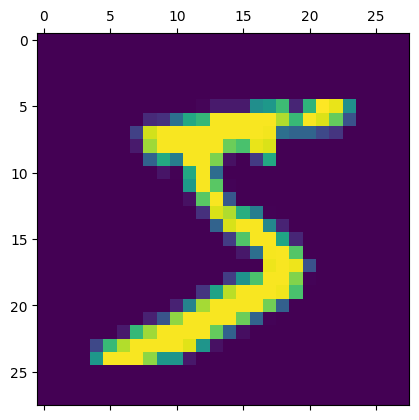

In [6]:
plt.matshow(x_train[0])

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid' )
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten, y_train, epochs = 10)



Epoch 1/10


1875/1875 [==============================] - 3s 1ms/step - loss: 9.4940 - accuracy: 0.8419
Epoch 2/10
1875/1875 [==============================] - 2s 977us/step - loss: 6.1649 - accuracy: 0.8781
Epoch 3/10
1875/1875 [==============================] - 2s 949us/step - loss: 5.6911 - accuracy: 0.8849
Epoch 4/10
1875/1875 [==============================] - 2s 924us/step - loss: 5.4939 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 2s 872us/step - loss: 5.5015 - accuracy: 0.8858
Epoch 6/10
1875/1875 [==============================] - 2s 882us/step - loss: 5.2807 - accuracy: 0.8879
Epoch 7/10
1875/1875 [==============================] - 2s 890us/step - loss: 5.2085 - accuracy: 0.8887
Epoch 8/10
1875/1875 [==============================] - 2s 909us/step - loss: 5.2402 - accuracy: 0.8884
Epoch 9/10
1875/1875 [==============================] - 2s 986us/step - loss: 5.2915 - accuracy: 0.8895
Epoch 10/10
1875/1875 [==============================] - 2s 98

In [11]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 960us/step - loss: 7.6526 - accuracy: 0.8658


[7.652612686157227, 0.8658000230789185]

In [12]:
y_predicted = model.predict(x_test_flatten)

313/313 [==============================] - 0s 913us/step


In [13]:
y_predicted[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 7.8832642e-32, 0.0000000e+00, 1.0000000e+00,
       4.9994565e-03, 1.0000000e+00], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

3

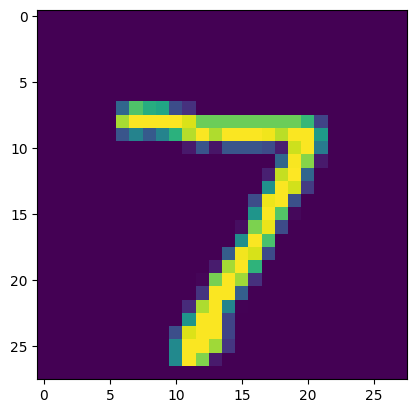

In [15]:
plt.imshow(x_test[0])

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    1,    1,    0,    0,    0,    0],
       [   7, 1126,    1,    0,    0,    1,    0,    0,    0,    0],
       [ 408,  315,  294,    2,   12,    0,    1,    0,    0,    0],
       [ 354,  181,  235,  240,    0,    0,    0,    0,    0,    0],
       [  87,   45,   23,  144,  681,    0,    0,    0,    2,    0],
       [ 375,   43,   77,  229,   80,   86,    2,    0,    0,    0],
       [ 246,   32,  293,  113,  193,   47,   34,    0,    0,    0],
       [ 114,   89,  100,  599,   67,   29,    0,   30,    0,    0],
       [ 150,  230,  180,  307,   54,   46,    1,    0,    6,    0],
       [  46,   52,   15,  474,  404,    4,    0,   11,    0,    3]])>

Text(95.72222222222221, 0.5, 'Truth')

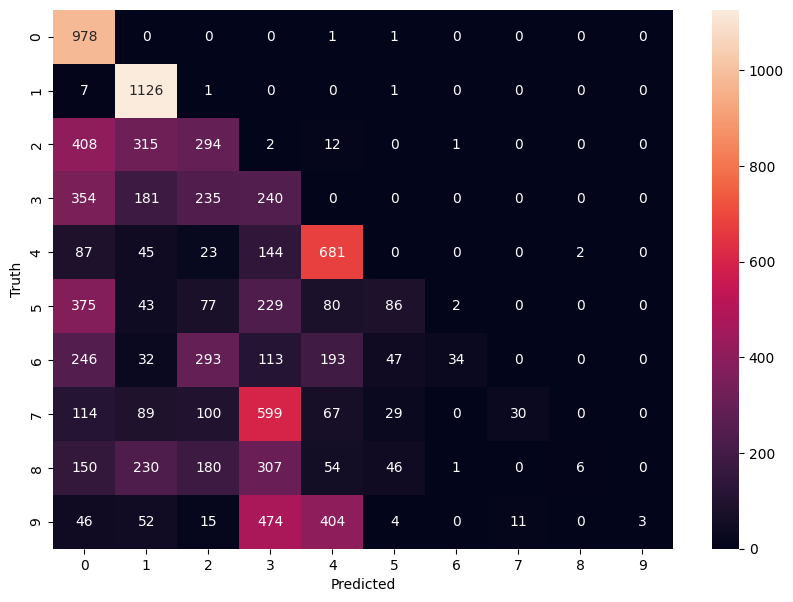

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [21]:
model_2 = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'relu' ),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5340 - accuracy: 0.8492
Epoch 2/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.2961 - accuracy: 0.9165
Epoch 3/5
1875/1875 [==============================] - 2s 969us/step - loss: 0.2689 - accuracy: 0.9246
Epoch 4/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.2557 - accuracy: 0.9284
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2462 - accuracy: 0.9309


In [22]:
y_predicted_2 = model_2.predict(x_test_flatten)

313/313 [==============================] - 0s 800us/step


In [23]:
y_predicted_2[0]

array([2.6122019e-01, 3.5552996e-06, 6.9823198e-02, 4.0980840e-01,
       8.6590935e-06, 2.3761455e-02, 1.6523718e-06, 9.9756789e-01,
       1.7672231e-02, 1.6771850e-01], dtype=float32)

In [24]:
y_test[0]

7

In [25]:
np.argmax(y_predicted_2[0])

7

In [26]:
y_predicted_labels_2 = [np.argmax(i) for i in y_predicted_2]

In [27]:
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    1,    3,    1,    1,    1,    0],
       [   0, 1092,    6,    2,    0,    1,    3,    2,   29,    0],
       [  11,    7,  933,   16,   10,    2,    8,    8,   35,    2],
       [   4,    1,   20,  931,    1,   13,    0,   12,   21,    7],
       [   2,    1,    7,    0,  919,    0,    5,    5,    8,   35],
       [  11,    1,    4,   44,   11,  786,    8,    4,   18,    5],
       [  17,    3,   10,    1,   11,   18,  893,    1,    4,    0],
       [   3,    5,   20,   10,    5,    1,    0,  946,    4,   34],
       [  10,    3,    6,   27,    8,   12,    6,    9,  887,    6],
       [  12,    1,    1,   15,   28,    6,    0,   13,   12,  921]])>

Text(95.72222222222221, 0.5, 'Truth')

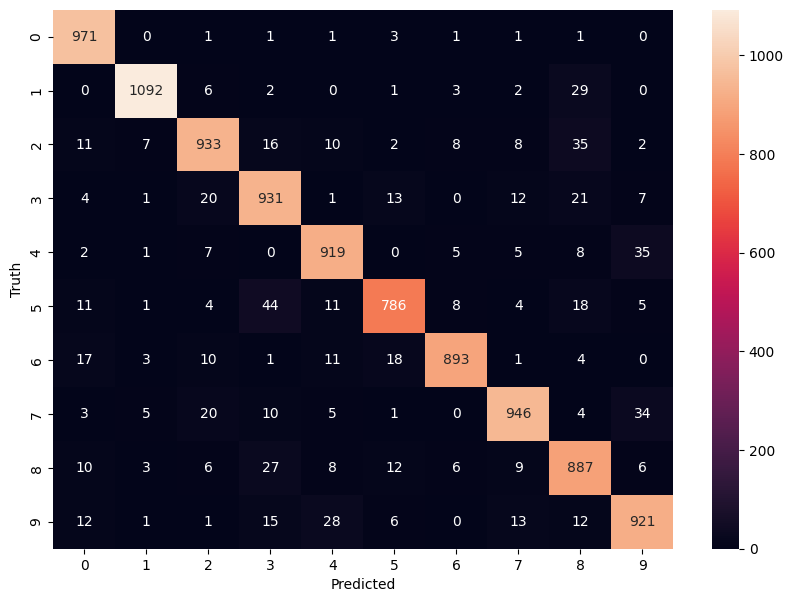

In [28]:
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model_3 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu' ),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train_flatten, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2640 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1204 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0852 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0641 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0520 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0426 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0337 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0278 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0242 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [30]:
y_predicted_3 = model_3.predict(x_test_flatten)

313/313 [==============================] - 0s 927us/step


In [31]:
y_predicted_labels_3 = [np.argmax(i) for i in y_predicted_3]

In [32]:
cm3 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_2)
cm3

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    1,    3,    1,    1,    1,    0],
       [   0, 1092,    6,    2,    0,    1,    3,    2,   29,    0],
       [  11,    7,  933,   16,   10,    2,    8,    8,   35,    2],
       [   4,    1,   20,  931,    1,   13,    0,   12,   21,    7],
       [   2,    1,    7,    0,  919,    0,    5,    5,    8,   35],
       [  11,    1,    4,   44,   11,  786,    8,    4,   18,    5],
       [  17,    3,   10,    1,   11,   18,  893,    1,    4,    0],
       [   3,    5,   20,   10,    5,    1,    0,  946,    4,   34],
       [  10,    3,    6,   27,    8,   12,    6,    9,  887,    6],
       [  12,    1,    1,   15,   28,    6,    0,   13,   12,  921]])>

In [33]:
model_3.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 941us/step - loss: 0.0788 - accuracy: 0.9772


[0.07884833216667175, 0.9771999716758728]

Text(95.72222222222221, 0.5, 'Truth')

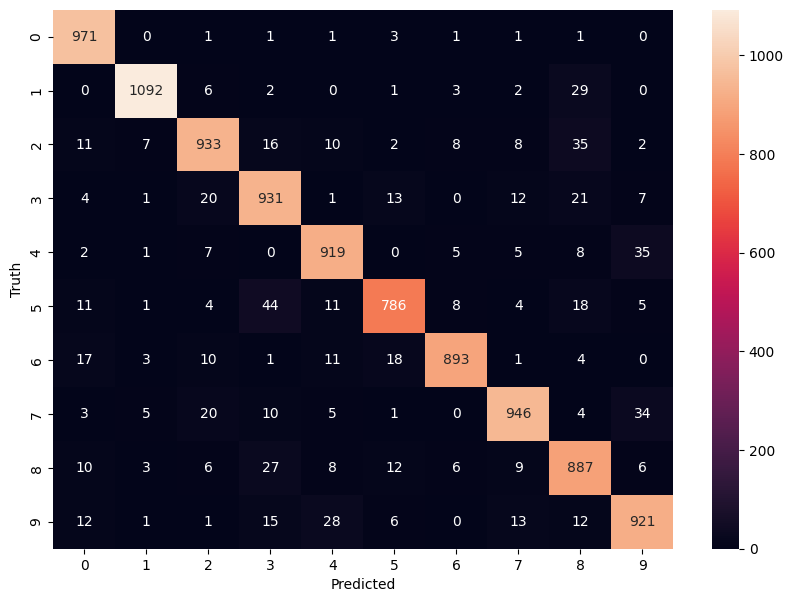

In [34]:
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
print(y_predicted_labels_3)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 3, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [36]:
import pickle as pkl

In [37]:
model_pkl_file = "Digit_classifier.pkl"
with open(model_pkl_file, 'wb') as file:
    pkl.dump(model_3, file)

In [38]:
from keras.models import load_model

model_3.save('Digit_classifier.h5')  # creates a HDF5 file 'my_model.h5'
# deletes the existing model

# returns a compiled model
# identical to the previous one

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
